In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
df_state = pd.read_csv("../data/statewise_electricity_clean.csv")

## Select Features for Clustering

In [ ]:
features = df_state[[
    "domestic_share",
    "commercial_share",
    "industrial_share",
    "agriculture_share"
]]

In [12]:
# Scale the Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

## Apply KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_state["cluster"] = kmeans.fit_predict(X_scaled)

In [16]:
cluster_profile = df_state.groupby("cluster")[[
    "domestic_share",
    "commercial_share",
    "industrial_share",
    "agriculture_share"
]].mean()

print(cluster_profile)

         domestic_share  commercial_share  industrial_share  agriculture_share
cluster                                                                       
0              0.244519          0.080489          0.330467           0.244429
1              0.540244          0.175727          0.134930           0.011018
2              0.200847          0.077744          0.614678           0.014728


## Map Clusters → Churn Labels

In [17]:
high_cluster = cluster_profile["industrial_share"].idxmax()
low_cluster = cluster_profile["industrial_share"].idxmin()

cluster_map = {
    high_cluster: "High",
    low_cluster: "Low"
}

df_state["ml_churn_risk"] = df_state["cluster"].map(cluster_map)
df_state["ml_churn_risk"].fillna("Medium", inplace=True)


## ML Results

In [18]:
df_state[[
    "state/_union_territory",
    "industrial_share",
    "domestic_share",
    "ml_churn_risk"
]].sort_values("industrial_share", ascending=False).head(10)


,state/_union_territory,industrial_share,domestic_share,ml_churn_risk
30,D. & N.Haveli,0.929603,0.016498,High
31,Daman & Diu,0.924850,0.038096,High
10,Jharkhand,0.754758,0.128717,High
34,Puducherry,0.686769,0.189675,High
8,Himachal Pradesh,0.623859,0.199454,High
5,Goa,0.619347,0.239406,High
19,Orissa,0.567091,0.251157,High
16,Meghalaya,0.559006,0.239757,High
25,Uttara Khand,0.483023,0.245539,High
4,Chhattisgarh,0.466332,0.181615,Medium


## ML Cluster Visualization

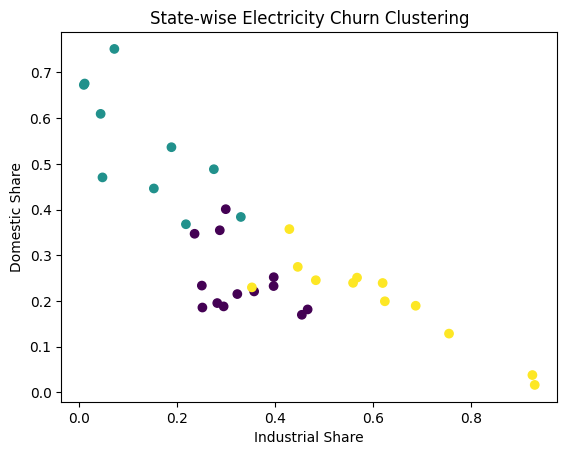

In [19]:
plt.figure()
plt.scatter(
    df_state["industrial_share"],
    df_state["domestic_share"],
    c=df_state["cluster"]
)
plt.xlabel("Industrial Share")
plt.ylabel("Domestic Share")
plt.title("State-wise Electricity Churn Clustering")
plt.show()


## Export FINAL Dataset

In [44]:
export_path = Path("../data/export")
export_path.mkdir(parents=True, exist_ok=True)

In [45]:
df_state.to_csv(
    export_path / "statewise_electricity_churn_ml.csv",
    index=False
)